In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
germany = pd.read_csv('german_credit.csv')

In [3]:
# You can access from https://www.kaggle.com/uciml/german-credit
# Read input file and understand the data
# "default" is my dependent variable
print(germany.shape)

(1000, 21)


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
set1, set2 = train_test_split(germany,test_size=0.5,random_state=1)

In [6]:
print(set1.shape)

(500, 21)


In [7]:
set1.head(2)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
789,1,< 0 DM,40,critical account/ other credits existing (not ...,(vacation - does not exist?),5998,... < 100 DM,1 <= ... < 4 years,4,male : single,...,3,unknown / no property,27,bank,own,1,skilled employee / official,1,"yes, registered under the customers name",yes
179,0,< 0 DM,21,critical account/ other credits existing (not ...,car (new),571,... < 100 DM,.. >= 7 years,4,male : single,...,4,real estate,65,none,own,2,skilled employee / official,1,none,yes


In [8]:
set1.reset_index(drop=True,inplace=True)

In [9]:
set1.head(2)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,1,< 0 DM,40,critical account/ other credits existing (not ...,(vacation - does not exist?),5998,... < 100 DM,1 <= ... < 4 years,4,male : single,...,3,unknown / no property,27,bank,own,1,skilled employee / official,1,"yes, registered under the customers name",yes
1,0,< 0 DM,21,critical account/ other credits existing (not ...,car (new),571,... < 100 DM,.. >= 7 years,4,male : single,...,4,real estate,65,none,own,2,skilled employee / official,1,none,yes


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [10]:
set1_dummy = pd.get_dummies(set1)
set1_dummy.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,1,40,5998,4,3,27,1,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,0,21,571,4,4,65,2,1,0,1,...,1,0,0,1,0,0,1,0,0,1
2,0,12,409,3,3,42,2,1,0,0,...,0,1,0,1,0,0,1,0,0,1
3,0,12,1264,4,4,57,1,1,0,0,...,0,1,0,0,0,1,1,0,0,1
4,1,24,4110,3,4,23,2,2,0,1,...,0,1,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [11]:
set1_dummy_corr = set1_dummy.corr()
set1_dummy_corr

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.154395,0.102781,0.130897,-0.004657,-0.135853,-0.047948,0.005908,0.119061,0.266244,...,-0.083858,0.095812,-0.007669,-0.004743,-0.006760,0.014965,0.066688,-0.066688,-0.071374,0.071374
duration_in_month,0.154395,1.000000,0.621934,0.121678,-0.009039,-0.054504,-0.078458,-0.057544,0.139030,-0.038817,...,-0.038749,-0.118875,0.196724,0.011255,-0.034287,-0.186423,-0.185221,0.185221,-0.127211,0.127211
credit_amount,0.102781,0.621934,1.000000,-0.215371,0.038010,0.058086,-0.021106,0.019018,0.138910,-0.082235,...,-0.109663,-0.072627,0.375525,-0.125468,-0.076678,-0.172477,-0.318831,0.318831,-0.062949,0.062949
installment_as_income_perc,0.130897,0.121678,-0.215371,1.000000,0.028310,0.042569,0.017900,-0.088701,-0.032336,0.054283,...,0.029932,-0.050538,0.037229,0.021447,-0.066777,-0.040887,0.009868,-0.009868,-0.039202,0.039202
present_res_since,-0.004657,-0.009039,0.038010,0.028310,1.000000,0.273547,0.064556,0.057483,-0.057776,0.030969,...,-0.256385,0.110245,-0.025189,-0.005186,0.047173,0.015645,-0.065494,0.065494,-0.087317,0.087317
age,-0.135853,-0.054504,0.058086,0.042569,0.273547,1.000000,0.142372,0.097632,-0.077660,-0.008085,...,-0.027520,-0.185217,0.131774,-0.194528,0.115356,0.081238,-0.144705,0.144705,-0.027273,0.027273
credits_this_bank,-0.047948,-0.078458,-0.021106,0.017900,0.064556,0.142372,1.000000,0.114729,-0.074201,-0.074377,...,0.050856,-0.014214,-0.053292,0.002889,0.094538,0.017696,0.004274,-0.004274,-0.017713,0.017713
people_under_maintenance,0.005908,-0.057544,0.019018,-0.088701,0.057483,0.097632,0.114729,1.000000,-0.093340,0.101191,...,-0.091633,-0.014426,0.001558,-0.084729,-0.047677,0.116626,-0.026513,0.026513,0.007102,-0.007102
account_check_status_0 <= ... < 200 DM,0.119061,0.139030,0.138910,-0.032336,-0.057776,-0.077660,-0.074201,-0.093340,1.000000,-0.369723,...,-0.018287,0.027613,0.091056,-0.062256,-0.032286,0.001275,-0.029607,0.029607,-0.051992,0.051992
account_check_status_< 0 DM,0.266244,-0.038817,-0.082235,0.054283,0.030969,-0.008085,-0.074377,0.101191,-0.369723,1.000000,...,-0.109210,0.067046,-0.036253,0.021532,0.002052,0.006714,0.100149,-0.100149,0.010024,-0.010024


### Drop the original variables which are converted to dummy

In [12]:
set1_dummy.select_dtypes(exclude=['int64','uint64','uint8']).dtypes
print('No columns to drop since get_dummies converted the original categorical values into numerical data')

No columns to drop since get_dummies converted the original categorical values into numerical data


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [13]:
x = set1_dummy.drop(columns=['default'])
x.shape

(500, 61)

In [14]:
y = set1_dummy.default
y.shape

(500,)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
x_train.shape

(350, 61)

In [17]:
y[2]

0

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
RFClass = RandomForestClassifier(n_estimators=500,n_jobs=2,criterion='entropy',random_state=9999)

In [20]:
RFClass_Model = RFClass.fit(x_train,y_train)

In [21]:
RFClass.score(x_test,y_test)

0.7533333333333333

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [22]:
from sklearn import metrics
y_predicted = RFClass.predict(x_test)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_predicted))
print("\nAccuracy Score:\n",metrics.accuracy_score(y_test,y_predicted))

Confusion Matrix:
 [[96  8]
 [29 17]]

Accuracy Score:
 0.7533333333333333


### Q6 Show the list of the features importance( 1 Marks)

In [23]:
pd.DataFrame(RFClass.feature_importances_,columns=["Imp"],index=x_train.columns)

,Imp
duration_in_month,0.061128
credit_amount,0.099335
installment_as_income_perc,0.042206
present_res_since,0.032136
age,0.087813
credits_this_bank,0.019030
people_under_maintenance,0.010315
account_check_status_0 <= ... < 200 DM,0.015470
account_check_status_< 0 DM,0.027337
account_check_status_>= 200 DM / salary assignments for at least 1 year,0.008618


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [24]:
# Use below values
num_folds = 10
seed = 77

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [26]:
kf=KFold(n_splits=10,shuffle=True,random_state=77)
acc=[]
ytest=[]
ypred=[]
for train,test in kf.split(x,y):
    RFClass = RandomForestClassifier(n_estimators=500,n_jobs=2,criterion='entropy',random_state=9999)
    Xtrain,Xtest = x.iloc[train,:],x.iloc[test,:]
    Ytrain,Ytest = y[train],y[test]
    RFClass.fit(Xtrain,Ytrain)
    Ypredict = RFClass.predict(Xtest)
    ytest.append(Ytest)
    ypred.append(Ypredict)
    acc.append(metrics.accuracy_score(Ytest,Ypredict))
    #print(metrics.confusion_matrix(Ytest,Ypredict))

In [27]:
#Validate the Random Forest model build above using k fold

In [28]:
print("Accuracy:",np.max(acc))

Accuracy: 0.86


In [29]:
#Calculate Mean score

In [30]:
print("Mean Score:%.2f%% " % np.mean(acc))

Mean Score:0.75% 


In [31]:
# Calculate score standard deviation using std()

In [32]:
print("Score Standard Deviation:%.2f%% " % np.std(acc))

Score Standard Deviation:0.06% 


# Q8 Print the confusion matrix( 1 Marks)

In [33]:
print(metrics.confusion_matrix(ytest[acc.index(np.max(acc))],ypred[acc.index(np.max(acc))]))

[[36  2]
 [ 5  7]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(ytest[acc.index(np.max(acc))],ypred[acc.index(np.max(acc))]))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91        38
          1       0.78      0.58      0.67        12

avg / total       0.85      0.86      0.85        50



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [36]:
#Hint: Use roc_curve

In [37]:
fpr,tpr,threshold = metrics.roc_curve(ytest[acc.index(np.max(acc))],ypred[acc.index(np.max(acc))])
print("False Positive Rate:\n",fpr)
print("True Positive Rate:\n",tpr)

False Positive Rate:
 [0.         0.05263158 1.        ]
True Positive Rate:
 [0.         0.58333333 1.        ]


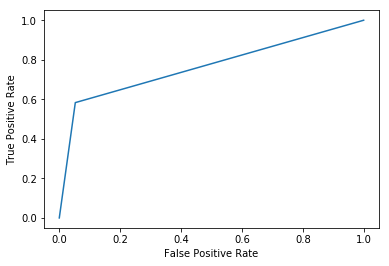

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)

In [39]:
print(metrics.roc_auc_score(ytest[acc.index(np.max(acc))],ypred[acc.index(np.max(acc))]))

0.7653508771929826


ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [40]:
print(metrics.auc(fpr,tpr))

0.7653508771929826


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [41]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [42]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
rfm=RandomForestClassifier(n_estimators=500,n_jobs=2,criterion='entropy',random_state=9999)
for i in range(bootstrap_iteration):
    X_, y_ = resample(x_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(x_test)
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [43]:
accuracy = np.array(accuracy)
print('Accuracy Score:')
print('Avearge:',accuracy.mean())
print('Standard deviation:', accuracy.std())

Accuracy Score:
Avearge: 0.7466666666666667
Standard deviation: 0.025121924908555686
